Importing Libraries

> *Indented block*



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Data Collection and Analysis

In [5]:
#Loading the data from .csv file to a Pandas Dataframe
delirium_data = pd.read_csv('eeg1 (1).csv')


In [6]:
#Printing the 1st 5 rows of the Dataframe
delirium_data.head()


,name,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,non-delirium,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,0.00784,1,74.997
1,delirium,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.00968,1,113.819
2,non-delirium,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,0.01050,1,111.555
3,non-delirium,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,0.00997,1,111.366
4,non-delirium,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,0.01284,1,110.655


In [7]:
#No. of rows and columns in the Dataframe
delirium_data.shape


(195, 33)

In [8]:
#Getting more infor about the dataset
delirium_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    195 non-null    object 
 1   Fp1     195 non-null    float64
 2   AF3     195 non-null    float64
 3   F3      195 non-null    float64
 4   F7      195 non-null    float64
 5   FC5     195 non-null    float64
 6   FC1     195 non-null    float64
 7   C3      195 non-null    float64
 8   T7      195 non-null    float64
 9   CP5     195 non-null    float64
 10  CP1     195 non-null    float64
 11  P3      195 non-null    float64
 12  P7      195 non-null    float64
 13  PO3     195 non-null    float64
 14  O1      195 non-null    float64
 15  Oz      195 non-null    float64
 16  Pz      195 non-null    float64
 17  Fp2     195 non-null    float64
 18  AF4     195 non-null    float64
 19  Fz      195 non-null    float64
 20  F4      195 non-null    float64
 21  F8      195 non-null    float64
 22  FC

In [9]:
#Checking for missing values in each column
delirium_data.isnull().sum()


name    0
Fp1     0
AF3     0
F3      0
F7      0
FC5     0
FC1     0
C3      0
T7      0
CP5     0
CP1     0
P3      0
P7      0
PO3     0
O1      0
Oz      0
Pz      0
Fp2     0
AF4     0
Fz      0
F4      0
F8      0
FC6     0
FC2     0
Cz      0
C4      0
T8      0
CP6     0
CP2     0
P4      0
P8      0
PO4     0
O2      0
dtype: int64

<Axes: ylabel='count'>

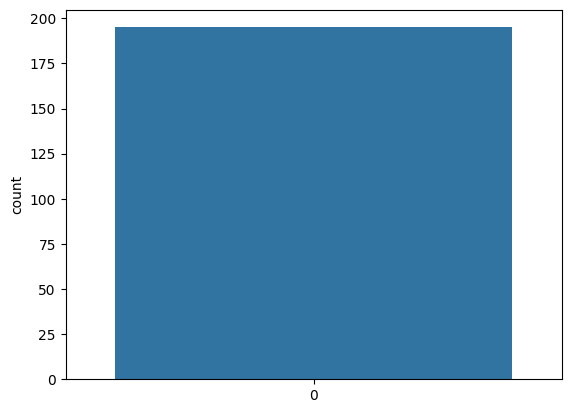

In [10]:
import seaborn as sns
sns.countplot(delirium_data['PO4'])

<Axes: ylabel='count'>

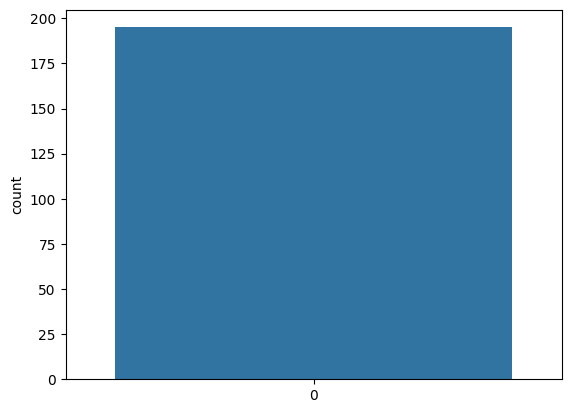

In [11]:
sns.countplot(delirium_data['O2'])

In [12]:
#Getting statistical measures about the data
delirium_data.describe()


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,-0.106505,-0.349343,-0.042240,-0.299562,0.226797,0.050570,0.262757,-0.339075,0.499166,-0.019999,...,-1.176044,0.003777,0.162426,-0.205818,0.528529,0.330874,0.202599,0.006220,0.753846,116.324631
std,5.413082,40.817099,4.231414,28.327196,32.842429,9.909672,31.506629,42.499395,57.459542,14.832331,...,196.030158,3.746052,16.718352,42.422750,85.065154,50.036629,29.564096,0.004848,0.431878,43.521413
min,-18.735390,-174.162043,-10.964000,-117.254905,-95.516772,-29.704726,-93.189754,-175.751521,-169.456961,-59.674319,...,-839.742441,-12.207208,-42.033744,-179.094185,-240.847897,-146.128309,-80.901045,0.001680,0.000000,65.476000
25%,-3.400272,-12.026347,-3.186378,-10.372932,-11.161279,-5.009656,-9.012655,-14.709759,-16.210154,-5.761297,...,-46.760695,-2.268921,-6.388532,-17.249298,-24.784211,-13.037962,-8.775240,0.003460,1.000000,84.291000
50%,0.405876,-0.259976,-0.126543,-0.265751,0.214436,-0.073445,0.666480,-0.410979,1.870917,0.246369,...,-2.669080,0.060986,0.264788,0.885534,0.361499,0.968173,-0.747113,0.004940,1.000000,104.315000
75%,3.057775,11.600970,2.561254,10.780359,9.818905,4.674052,8.440832,17.121559,14.427592,5.516463,...,54.802399,2.483893,7.185898,16.891510,21.546786,12.277061,8.434530,0.007365,1.000000,140.018500
max,14.212123,113.828207,11.656166,73.831522,140.707711,38.094272,133.738083,118.616808,247.950231,43.397580,...,580.377956,9.599755,71.302678,124.343828,366.740914,214.349394,126.611391,0.033160,1.000000,239.170000


In [13]:
#Distribution of target Variable
delirium_data['PO4'].value_counts()


1    147
0     48
Name: PO4, dtype: int64

In [14]:
#Grouping data based on target variable
delirium_data.groupby('O2').mean()


<ipython-input-14-6666bed06d92>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delirium_data.groupby('O2').mean()


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4
O2,,,,,,,,,,,,,,,,,,,,,
65.476,2.511407,3.546602,0.712222,1.542179,2.627335,2.293633,2.396762,11.832288,2.481620,10.529218,...,-3.372557,20.824231,-1.544937,-3.561599,-19.619231,-14.429211,-6.707974,-4.051094,0.00831,1.0
65.750,1.523237,-0.602506,0.640910,-3.681350,-0.495385,2.997768,4.650823,-28.775490,7.566945,7.618182,...,-6.954164,-2.220223,0.737023,2.709824,-24.769721,0.250220,2.563290,3.475162,0.00971,1.0
65.782,-4.891851,-10.492788,-5.619745,-11.705940,-3.610297,-2.390153,-0.129345,-6.858936,1.870917,2.305762,...,-5.458472,5.163933,-0.389791,3.313404,11.816830,1.591645,1.168659,5.068995,0.00840,1.0
65.809,-5.207181,6.955801,-5.427543,2.754774,-13.473625,-7.964273,-8.062369,11.141585,-9.598495,2.847694,...,17.914322,39.893803,-4.570857,-3.698133,23.303497,-20.345045,-12.766406,-6.679291,0.01101,1.0
66.004,-4.054660,5.169865,-6.358872,-0.265751,-19.953521,-11.489155,-13.228803,-9.802602,-19.092280,2.100287,...,18.611819,52.774316,-5.288666,-0.380718,24.318334,-15.632878,-13.011219,-1.542947,0.00923,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231.848,0.050468,-1.953385,-4.113892,-5.008174,-4.581118,2.247499,0.945681,-12.860464,0.103898,1.990105,...,2.150231,1.279941,3.298961,3.885983,-17.674799,0.087917,3.839810,-0.747113,0.00235,0.0
232.435,-3.733645,-12.986918,0.386958,-7.767238,10.085025,0.413109,9.076155,3.159986,16.212041,3.101214,...,-9.745200,-31.051305,-0.401753,5.857834,11.117755,11.453506,9.028562,3.245566,0.00210,0.0
232.483,1.241557,-0.259976,2.339915,2.027353,3.877634,-0.121861,1.774618,3.985802,-0.934639,0.829981,...,2.145985,-2.182863,-0.347955,-0.987527,11.832682,-1.560918,1.123065,-1.065610,0.00281,0.0


Data Pre-Processing

Separating the Features and Target

In [15]:
X = delirium_data.drop(columns=['name','PO4'], axis=1)
Y = delirium_data['name']

In [16]:
print(Y)


0      non-delirium
1          delirium
2      non-delirium
3      non-delirium
4      non-delirium
           ...     
190        delirium
191    non-delirium
192    non-delirium
193    non-delirium
194        delirium
Name: name, Length: 195, dtype: object


Splitting data into Test and Training Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [18]:
print(X.shape, X_train.shape, X_test.shape)


(195, 31) (156, 31) (39, 31)


Data Standardization

In [19]:
scaler = StandardScaler()


In [20]:
scaler.fit(X_train)


StandardScaler()

In [21]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
print(X_train)


[[ 1.48054249  0.91166249  1.55305168 ... -0.90385606  0.36806203
  -0.87985049]
 [ 2.43532539  1.16410414 -0.86819113 ... -1.27953593 -0.12997764
  -0.9284778 ]
 [ 0.57131577  0.49533405  0.98743891 ... -0.70725335 -0.55550578
  -1.12211107]
 ...
 [-0.76992339 -0.26497566 -0.40735681 ...  0.33950573 -0.46582048
  -0.160638  ]
 [ 0.65587375  0.05603319  0.03985073 ... -0.0270407  -0.53451561
  -0.79063679]
 [-2.72115468 -3.11604831  1.01642681 ...  3.09530731  0.29364231
  -0.61914972]]


Model Training

Support Vector Machine (SVM) Model

In [23]:
model = svm.SVC(kernel='linear')


In [24]:
#Training SVM model with training data
model.fit(X_train, Y_train)


SVC(kernel='linear')

## Model Evaluation

Accuracy Score

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = (accuracy_score(Y_train, X_train_prediction)*100)

In [26]:
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  80.12820512820514


In [27]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = (accuracy_score(Y_test, X_test_prediction)*100)

In [28]:
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of test data :  79.48717948717949


# Building a Predictive System

In [29]:
input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01070,)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)



if (prediction[0] == 0):
  print("The Person does not have Delirium")

else:
  print("The Person has Delirium")

The Person has Delirium


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
